<a href="https://colab.research.google.com/github/hch507/mnist-classification/blob/main/mnist_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt 

In [61]:
mnist = tf.keras.datasets.mnist

In [78]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
#x_test = x_test.reshape((-1, 28, 28, 1))


In [63]:
print(len(x_train))
print(x_train.shape)
print(len(y_train))
print(y_train.shape)
print(len(x_test))
print(x_test.shape)
print(len(y_test))
print(y_test.shape)

60000
(60000, 28, 28, 1)
60000
(60000,)
10000
(10000, 28, 28, 1)
10000
(10000,)


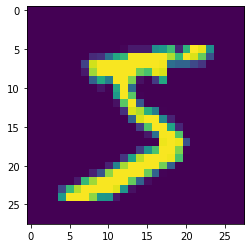

In [64]:
plt.imshow(x_train[0,:,:,0])

In [65]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [66]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 128)       147584    
                                                                 
 flatten_4 (Flatten)         (None, 12800)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1638528   
                                                      

In [67]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
model.fit(x_train, y_train,
          epochs=10
          
          )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0949 - accuracy: 0.9707
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0092 - accuracy: 0.9968
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0093 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [69]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0346 - accuracy: 0.9906


[0.03457332029938698, 0.9905999898910522]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


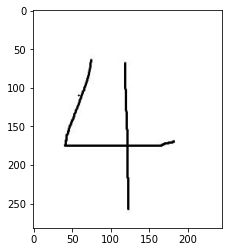

In [115]:
from google.colab import drive
import cv2
import numpy as np

drive.mount('/content/drive')
image = '/content/drive/MyDrive/Colab Notebooks/num.JPG'
test_image = cv2.imread(image, cv2.IMREAD_COLOR)

plt.imshow(test_image)


784

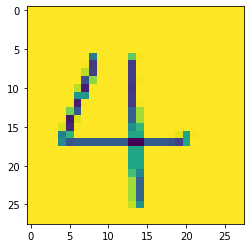

In [116]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

test_image = cv2.resize(test_image, (28,28),interpolation=cv2.INTER_AREA)
test_image = test_image / 255.0

plt.imshow(test_image)
test_image.size

In [117]:

pred = model.predict(test_image.reshape((1, 28, 28, 1)))


In [118]:
pred

array([[0.09467912, 0.09501643, 0.11941528, 0.07097201, 0.14007324,
        0.09381001, 0.07272906, 0.07967124, 0.12024304, 0.11339056]],
      dtype=float32)

In [119]:
np.argmax(pred)

4

(10000, 28, 28)

In [121]:
x_predict = model.predict(x_test[1].reshape((1, 28, 28, 1)))

In [122]:
x_predict

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [123]:
np.argmax(x_predict)

2

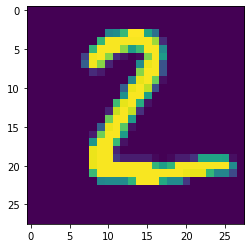

In [124]:
plt.imshow(x_test[1])